<h1> Sentiment Analysis and Naive Bayes</h1>

In [1]:
pip install nltk


/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk 
from nltk.classify import textcat
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB, CategoricalNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

In [4]:
nltk.download('crubadan')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package crubadan to
[nltk_data]     /home/nbgrader/fall21/student-
[nltk_data]     acounts/prenio/nltk_data...
[nltk_data]   Package crubadan is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/nbgrader/fall21/student-
[nltk_data]     acounts/prenio/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nbgrader/fall21/student-
[nltk_data]     acounts/prenio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
df = pd.read_csv('YouTubeData_Clean.csv')

print(df.shape)
df.head()


(298058, 18)


,UploadDate,FetchedDate,UploaderID,SubCount,ViewCount,LikeCount,DislikeCount,IsCrawlable,IsAgeLimit,IsLiveContent,HasSubtitles,IsCommentsEnabled,IsAdsEnabled,Title,Uploader,year,month,day
0,20160205,20211127,UCB9hwIY2wUoZ7mKxgpwKwGg,789,778,12,0,1,0,0,0,0,0,Eltávozott nap,Illés-Ensemble - Topic,2016,2,5
1,20121001,20211127,UC8li7azknzQ4ISoDeVzLE4g,221,32,1,0,1,0,0,0,1,0,Hitlist Fail:/ #B2R,ZestyHDx,2012,10,1
2,20210601,20211127,UC2XIv2_zfyI2BAEbspxtLVA,112,12,2,0,1,0,0,1,1,0,Call of Duty® warzone amp63,perro Darth Vader,2021,6,1
3,20210523,20211127,UCovtY8t6mYpF2FS_RepKU7A,97,45,16,0,1,0,0,0,1,0,حالات واتساب اجمل صوت (سلمت قلبي ❤) تصميمي.,💚ناصرة للحجة 313💚,2021,5,23
4,20201124,20211127,UCFjTneWPdUl1fHYTL57wmZw,469,16,6,0,1,0,0,1,1,0,Fight Club (1999) Spoiler Review,Jacob Martin,2020,11,24


In [6]:
text = "Bonjour! Je m'apelle Pierce!"
textcat.TextCat().guess_language(text)


'fra'

In [ ]:
df['Lang'] = df['Title'].apply(lambda x: tc.guess_language(x))


In [15]:
#df.to_csv('DataClean_Lang', index=False)
#The previous line took 10 hours so the result was saved as a csv file
#The csv file will be imported again so there wont be another 10 hour wait.

df = pd.read_csv('DataClean_Lang.csv')

print(df.shape)
df.head()


(298058, 19)


,UploadDate,FetchedDate,UploaderID,SubCount,ViewCount,LikeCount,DislikeCount,IsCrawlable,IsAgeLimit,IsLiveContent,HasSubtitles,IsCommentsEnabled,IsAdsEnabled,Title,Uploader,year,month,day,Lang
0,20160205,20211127,UCB9hwIY2wUoZ7mKxgpwKwGg,789,778,12,0,1,0,0,0,0,0,Eltávozott nap,Illés-Ensemble - Topic,2016,2,5,hun
1,20121001,20211127,UC8li7azknzQ4ISoDeVzLE4g,221,32,1,0,1,0,0,0,1,0,Hitlist Fail:/ #B2R,ZestyHDx,2012,10,1,eng
2,20210601,20211127,UC2XIv2_zfyI2BAEbspxtLVA,112,12,2,0,1,0,0,1,1,0,Call of Duty® warzone amp63,perro Darth Vader,2021,6,1,eng
3,20210523,20211127,UCovtY8t6mYpF2FS_RepKU7A,97,45,16,0,1,0,0,0,1,0,حالات واتساب اجمل صوت (سلمت قلبي ❤) تصميمي.,💚ناصرة للحجة 313💚,2021,5,23,arb
4,20201124,20211127,UCFjTneWPdUl1fHYTL57wmZw,469,16,6,0,1,0,0,1,1,0,Fight Club (1999) Spoiler Review,Jacob Martin,2020,11,24,eng


In [16]:
df["Lang"].value_counts(normalize=True)

eng     0.301998
eng     0.146680
ssw     0.082212
abk     0.044357
sun     0.043434
          ...   
kam     0.000003
urh     0.000003
kri     0.000003
mho     0.000003
csa     0.000003
Name: Lang, Length: 422, dtype: float64

In [17]:
#There exists 2 values for English: "eng" and "eng ".
#Only taking the first 3 characters from the string

df = df.assign(Lang = df['Lang'].str[:3])

#Sanity Check
df["Lang"].value_counts()

eng    133732
ssw     24504
abk     13221
sun     12946
por     11933
        ...  
lia         1
lns         1
urh         1
eml         1
fon         1
Name: Lang, Length: 421, dtype: int64

In [18]:
#Only taking observations with titles in english
df_eng = df.copy().query("Lang == 'eng'")
df_eng
df_eng.head()

,UploadDate,FetchedDate,UploaderID,SubCount,ViewCount,LikeCount,DislikeCount,IsCrawlable,IsAgeLimit,IsLiveContent,HasSubtitles,IsCommentsEnabled,IsAdsEnabled,Title,Uploader,year,month,day,Lang
1,20121001,20211127,UC8li7azknzQ4ISoDeVzLE4g,221,32,1,0,1,0,0,0,1,0,Hitlist Fail:/ #B2R,ZestyHDx,2012,10,1,eng
2,20210601,20211127,UC2XIv2_zfyI2BAEbspxtLVA,112,12,2,0,1,0,0,1,1,0,Call of Duty® warzone amp63,perro Darth Vader,2021,6,1,eng
4,20201124,20211127,UCFjTneWPdUl1fHYTL57wmZw,469,16,6,0,1,0,0,1,1,0,Fight Club (1999) Spoiler Review,Jacob Martin,2020,11,24,eng
5,20090516,20211127,UCBN5ehPskaA2ubRMPF5BjJA,2009,413449,1513,220,1,0,0,0,1,0,HHO Explosion and Implosion,hgfrind,2009,5,16,eng
7,20120508,20211127,UC2XNlxF2ldjzAfMFR3PISgw,66,3175,15,1,1,0,0,0,1,1,Harmonie'67 speelt The Legend of Flathead Lake,Harmonie67Groningen,2012,5,8,eng


In [19]:
# After cleaning
df_eng['Title'] = df_eng['Title'].str.replace(
   '\W', ' ') # Removes punctuation
df_eng['Title'] = df_eng['Title'].str.lower()
df_eng.head()

<ipython-input-19-32578c4c96d0>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_eng['Title'] = df_eng['Title'].str.replace(


,UploadDate,FetchedDate,UploaderID,SubCount,ViewCount,LikeCount,DislikeCount,IsCrawlable,IsAgeLimit,IsLiveContent,HasSubtitles,IsCommentsEnabled,IsAdsEnabled,Title,Uploader,year,month,day,Lang
1,20121001,20211127,UC8li7azknzQ4ISoDeVzLE4g,221,32,1,0,1,0,0,0,1,0,hitlist fail b2r,ZestyHDx,2012,10,1,eng
2,20210601,20211127,UC2XIv2_zfyI2BAEbspxtLVA,112,12,2,0,1,0,0,1,1,0,call of duty warzone amp63,perro Darth Vader,2021,6,1,eng
4,20201124,20211127,UCFjTneWPdUl1fHYTL57wmZw,469,16,6,0,1,0,0,1,1,0,fight club 1999 spoiler review,Jacob Martin,2020,11,24,eng
5,20090516,20211127,UCBN5ehPskaA2ubRMPF5BjJA,2009,413449,1513,220,1,0,0,0,1,0,hho explosion and implosion,hgfrind,2009,5,16,eng
7,20120508,20211127,UC2XNlxF2ldjzAfMFR3PISgw,66,3175,15,1,1,0,0,0,1,1,harmonie 67 speelt the legend of flathead lake,Harmonie67Groningen,2012,5,8,eng


In [20]:
from nltk import word_tokenize
from nltk.stem import PorterStemmer
  
ps = PorterStemmer()

In [21]:
df_eng['Title'] = df_eng['Title'].apply(word_tokenize)

df_eng['Title'].head()

1                                 [hitlist, fail, b2r]
2                     [call, of, duty, warzone, amp63]
4                 [fight, club, 1999, spoiler, review]
5                     [hho, explosion, and, implosion]
7    [harmonie, 67, speelt, the, legend, of, flathe...
Name: Title, dtype: object

In [22]:
vocabulary = []
for title in df_eng['Title']:
    for word in title:
        vocabulary.append(ps.stem(word))

#Removing frequent words
stop_words = set(stopwords.words('english'))  

filtered_vocab = [w for w in vocabulary if not w.lower() in stop_words]
  
filtered_vocab = []
  
for w in vocabulary:
    if w not in stop_words:
        filtered_vocab.append(w)        
        
len(filtered_vocab)

887249

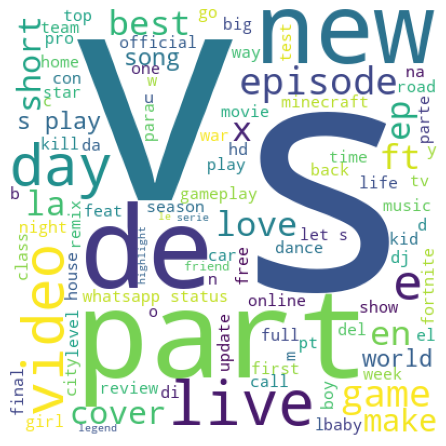

In [23]:
##plotting word cloud of words in the titles


alltitles = ''
for word in df_eng['Title']:
    alltitles = alltitles + (' ').join(word)

titlecloud = WordCloud(width = 400, height = 400,
                background_color ='white',
                stopwords =  set(STOPWORDS),
                min_font_size = 10).generate(alltitles)


#plot the WordCloud image                      
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(titlecloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
#Making the data frame for the rank
freq_words = pd.Series(filtered_vocab).value_counts().index.tolist()
freq_count = list(pd.Series(filtered_vocab).value_counts())

data = {'Word' : freq_words,
        'Count': freq_count}

df_rank = pd.DataFrame(data)

df_rank['Rank'] = df_rank["Count"].rank(ascending=False)
df_rank['Rank'] = df_rank['Rank'].astype(int)
df_rank.head(50)


In [ ]:
import time
tic = time.perf_counter()
#Ranking the titles

#Making a for loop that takes in the title, ranks each word, and returns the average number
ind = 0
average_rank = []
for i in df_eng['Title']:
    ind += 1
    x = 0
    n = len(i)
    p = 0
    for word in i:
        if word in freq_words:
            x = x + freq_words.index(word)+1
        else:
            p += 1
    if p == n:
        p = n-p
    average_rank.append(x/(n-p))
    print(f"{time.perf_counter() - tic:0.4f} | Analyzing {ind} of {len(df_eng)} titles. {(x/n)}")



In [ ]:
#df_eng.head(57)
#(freq_words.index('fight') + 1 + freq_words.index('club') + 1 +  freq_words.index('1999') + 1 + freq_words.index('spoiler') + 1 + freq_words.index('review') + 1)/5

df_eng['AverageRank'] = np.array(average_rank)
df_eng

In [5]:
#Finding the average ranks for every title took sometime
#Again we will save our progress and save this data frame as a csv file
#df_eng.to_csv('DataClean_Rank.csv', index=False)

#We will reset out variable 'df' to be the updated and cleaned data

df = pd.read_csv('DataClean_Rank.csv')

print(df.shape)
df.head()



(133732, 20)


,UploadDate,FetchedDate,UploaderID,SubCount,ViewCount,LikeCount,DislikeCount,IsCrawlable,IsAgeLimit,IsLiveContent,HasSubtitles,IsCommentsEnabled,IsAdsEnabled,Title,Uploader,year,month,day,Lang,AverageRank
0,20121001,20211127,UC8li7azknzQ4ISoDeVzLE4g,221,32,1,0,1,0,0,0,1,0,"['hitlist', 'fail', 'b2r']",ZestyHDx,2012,10,1,eng,53735.0
1,20210601,20211127,UC2XIv2_zfyI2BAEbspxtLVA,112,12,2,0,1,0,0,1,1,0,"['call', 'of', 'duty', 'warzone', 'amp63']",perro Darth Vader,2021,6,1,eng,51940.5
2,20201124,20211127,UCFjTneWPdUl1fHYTL57wmZw,469,16,6,0,1,0,0,1,1,0,"['fight', 'club', '1999', 'spoiler', 'review']",Jacob Martin,2020,11,24,eng,899.2
3,20090516,20211127,UCBN5ehPskaA2ubRMPF5BjJA,2009,413449,1513,220,1,0,0,0,1,0,"['hho', 'explosion', 'and', 'implosion']",hgfrind,2009,5,16,eng,65422.0
4,20120508,20211127,UC2XNlxF2ldjzAfMFR3PISgw,66,3175,15,1,1,0,0,0,1,1,"['harmonie', '67', 'speelt', 'the', 'legend', ...",Harmonie67Groningen,2012,5,8,eng,35623.0


In [ ]:
#Find data 1 standard deviation above the mean for rank
#Find videos that contain a word in the top 50 most used words
#Assign variable PotentialClickbait
average_rank = list(df["AverageRank"])
view_count = list(df["ViewCount"])
sub_count = list(df["SubCount"])

rank_u = np.mean(average_rank)
rank_sd = np.std(average_rank)

rank_med = np.median(average_rank)
view_med = np.median(view_count)
view_med

#Standard deviation is greater than the mean, meaning that the data has abnormal distribution.
#The median will be used instead. Anything below the median rank will be considered.
#The amount of views will also be considered. Anything ubove the median will be considered

In [ ]:
top_50 = freq_words[:50]

#Making a for loop that fitlers if the rank is below the median and if view is above the median
ind = 0
potential_clickbait = []
for i in df["Title"]:
    x = 0
    if average_rank[ind] <= rank_med:
        if view_count[ind] >= view_med:
            x = 1
    if view_count[ind] > sub_count[ind]:
            x = 1
    potential_clickbait.append(x)
    ind += 1

In [ ]:
pd.Series(potential_clickbait).value_counts(normalize=True)

In [ ]:
df['PotentialClickbait'] = np.array(potential_clickbait)
df[df["PotentialClickbait"] == 1]


In [24]:
#With all the data cleaning finished, we once again save the data frame as a csv and can continue with Naive Bayes
#df.to_csv('DataClean_NB.csv', index=False)
df = pd.read_csv('DataClean_NB.csv')
 
df_NB = pd.DataFrame(df["ViewCount"])
#df_NB["SubCount"] = 
df_NB["AverageRank"] = df["AverageRank"]
df_NB["PotentialClickbait"] = df["PotentialClickbait"]
df_NB

,ViewCount,AverageRank,PotentialClickbait
0,32,53735.000000,0
1,12,51940.500000,0
2,16,899.200000,0
3,413449,65422.000000,1
4,3175,35623.000000,1
...,...,...,...
133727,58,30055.000000,0
133728,9772,33937.714286,1
133729,220,25573.666667,1
133730,49,1501.200000,0


In [ ]:
# Randomize the dataset
np.random.seed(1234)
data_randomized = df_NB.sample(frac=1, random_state=1)

# Split data 70/30
index = round(len(data_randomized) * 0.7)

# Split into training and test sets
training_set = data_randomized[:index].reset_index(drop=True)
test_set = data_randomized[index:].reset_index(drop=True)

print(training_set.shape)
print(test_set.shape)

In [ ]:
training_set['PotentialClickbait'].value_counts(normalize=True)

In [ ]:
test_set['PotentialClickbait'].value_counts(normalize=True)

In [ ]:
trainX = training_set.iloc[:,:-1]
trainy = training_set['PotentialClickbait']

colnames = trainX.columns

trainX.head()
#trainy.head()

In [ ]:
testX = test_set.iloc[:,:-1]
testy = test_set["PotentialClickbait"]


#Sanity Check
testX.head()
testy.head()

In [ ]:
le = LabelEncoder()

trainBrnli = le.fit_transform(trainy)

trainBrnli[:5] #print first 5 of train Bernoulli (check that No=0, Yes=1)

In [ ]:
enc = OrdinalEncoder() 

trainX = enc.fit_transform(trainX) 

trainX = pd.DataFrame(trainX, columns=colnames)

trainX.head()  #sanity check

In [ ]:
model = CategoricalNB()  #create model object
model.fit(trainX,trainBrnli) # fit on train data



In [ ]:
yhattrain = model.predict(trainX) # predict on train data

In [ ]:
## confusion matrix using pandas method crosstab
pd.crosstab(yhattrain, trainy)

In [ ]:
accuracy_score(yhattrain, trainBrnli)

In [ ]:

testBrnli = le.fit_transform(testy)

testX = enc.fit_transform(testX) 

testX = pd.DataFrame(testX, columns=colnames)
                                              

yhattest = model.predict(testX)

In [ ]:
cm = confusion_matrix(yhattest, testBrnli)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
accuracy_score(yhattest, testBrnli)

## Naive bayes for just ViewCount and DislikeCount

In [25]:
df_NB2 = df[["ViewCount", "SubCount", "LikeCount", "DislikeCount", "IsCrawlable", "IsAgeLimit", "IsLiveContent", "IsCommentsEnabled", "IsAdsEnabled", "AverageRank", "PotentialClickbait",]]
df_NB2

,ViewCount,SubCount,LikeCount,DislikeCount,IsCrawlable,IsAgeLimit,IsLiveContent,IsCommentsEnabled,IsAdsEnabled,AverageRank,PotentialClickbait
0,32,221,1,0,1,0,0,1,0,53735.000000,0
1,12,112,2,0,1,0,0,1,0,51940.500000,0
2,16,469,6,0,1,0,0,1,0,899.200000,0
3,413449,2009,1513,220,1,0,0,1,0,65422.000000,1
4,3175,66,15,1,1,0,0,1,1,35623.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
133727,58,1000,4,0,1,0,0,1,0,30055.000000,0
133728,9772,8,68,3,1,0,0,1,1,33937.714286,1
133729,220,210,16,0,1,0,0,1,1,25573.666667,1
133730,49,72,10,0,1,0,0,1,0,1501.200000,0


In [26]:
# Randomize the dataset
np.random.seed(1234)
data_randomized = df_NB2.sample(frac=1, random_state=1)

# Split data 70/30
index = round(len(data_randomized) * 0.7)

# Split into training and test sets
training_set = data_randomized[:index].reset_index(drop=True)
test_set = data_randomized[index:].reset_index(drop=True)

print(training_set.shape)
print(test_set.shape)

(93612, 11)
(40120, 11)


In [27]:
trainX = training_set.iloc[:,:-1]
trainy = training_set['PotentialClickbait']

colnames = trainX.columns

trainX.head()
#trainy.head()

,ViewCount,SubCount,LikeCount,DislikeCount,IsCrawlable,IsAgeLimit,IsLiveContent,IsCommentsEnabled,IsAdsEnabled,AverageRank
0,271,40,11,0,1,0,0,0,0,263.000000
1,84,382,0,0,1,0,0,1,0,23978.400000
2,737,125,9,2,1,0,0,1,0,28324.083333
3,2,69,0,0,1,0,0,1,0,70.000000
4,44,3,0,0,1,0,0,1,0,25983.000000


In [28]:
testX = test_set.iloc[:,:-1]
testy = test_set["PotentialClickbait"]


#Sanity Check
testX.head()
testy.head()

0    0
1    0
2    1
3    0
4    1
Name: PotentialClickbait, dtype: int64

In [29]:
le = LabelEncoder()

trainBrnli = le.fit_transform(trainy)

trainBrnli[:5] #print first 5 of train Bernoulli (check that No=0, Yes=1)

array([1, 0, 1, 0, 1])

In [30]:
enc = OrdinalEncoder() 

trainX = enc.fit_transform(trainX) 

trainX = pd.DataFrame(trainX, columns=colnames)

trainX.head()  #sanity check

,ViewCount,SubCount,LikeCount,DislikeCount,IsCrawlable,IsAgeLimit,IsLiveContent,IsCommentsEnabled,IsAdsEnabled,AverageRank
0,271.0,39.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,1625.0
1,84.0,381.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,50556.0
2,737.0,124.0,9.0,2.0,1.0,0.0,0.0,1.0,0.0,54603.0
3,2.0,68.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,350.0
4,44.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,52565.0


In [31]:
model = CategoricalNB()  #create model object
model.fit(trainX,trainBrnli) # fit on train data


CategoricalNB()

In [32]:
yhattrain = model.predict(trainX) # predict on train data

In [33]:
## confusion matrix using pandas method crosstab
pd.crosstab(yhattrain, trainy)

PotentialClickbait,0,1
row_0,,
0,45254,5835
1,5569,36954


In [34]:
accuracy_score(yhattrain, trainBrnli)

0.8781780113660642

In [35]:

testBrnli = le.fit_transform(testy)

testX = enc.fit_transform(testX) 

testX = pd.DataFrame(testX, columns=colnames)
                                              

yhattest = model.predict(testX)

<AxesSubplot:>

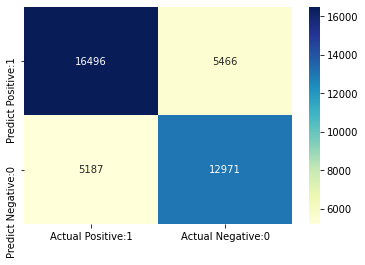

In [36]:
cm = confusion_matrix(yhattest, testBrnli)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [37]:
accuracy_score(yhattest, testBrnli)

0.7344715852442671